In [170]:
import pandas as pd
import os

In [171]:
pwd = os.getcwd()

In [172]:
mb = pd.read_csv(pwd + '/Data/Data - Map Banned.csv', usecols=['Map','Total']).iloc[1:]
mp = pd.read_csv(pwd + '/Data/Data - Map Picked.csv', usecols=['Map','Total'])
ss = pd.read_csv(pwd + '/Data/Data - Side Statistics.csv')


In [173]:
map_data = pd.merge(mp,mb, on='Map')
map_data = pd.merge(map_data,ss, on='Map')
map_data

,Map,Total_x,Total_y,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [174]:
map_data=map_data.rename(columns={'Total_x': 'Picked','Total_y':'Banned'})
map_data

,Map,Picked,Banned,Atk Wins,Def Wins
0,Ascent,16,18,145,138
1,Bind,19,15,157,183
2,Fracture,5,29,51,53
3,Haven,12,22,107,109
4,Lotus,16,18,151,123
5,Pearl,16,18,149,151
6,Split,22,12,178,138


In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

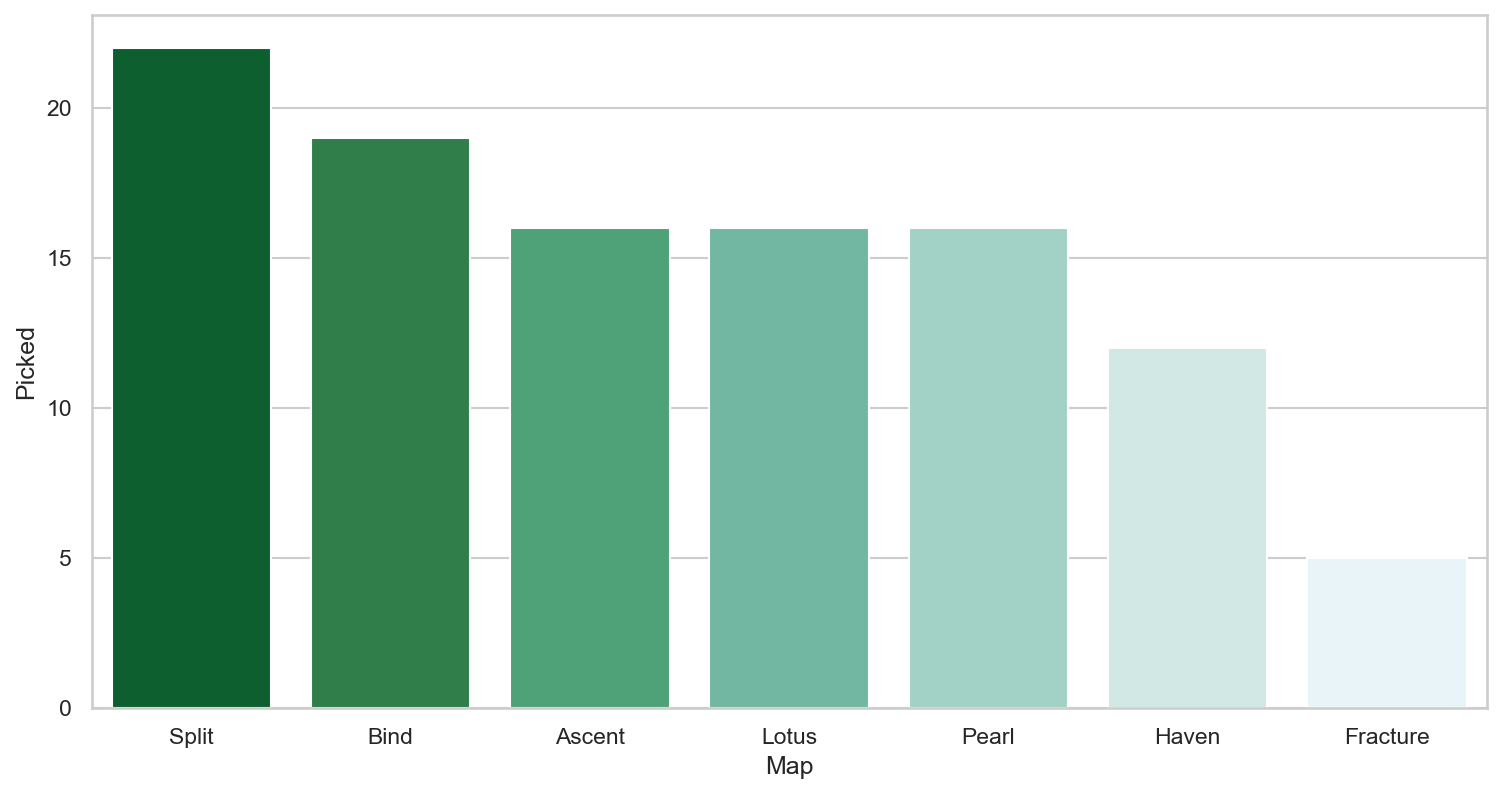

In [176]:
plt.figure(dpi=150, figsize=(12,6))

map_pick_sorted = map_data.sort_values(by='Picked', ascending=False)
sns.barplot(data=map_pick_sorted, x='Map', y='Picked', palette='BuGn_r')



plt.savefig('Images/Map Picks.jpeg')
plt.show()


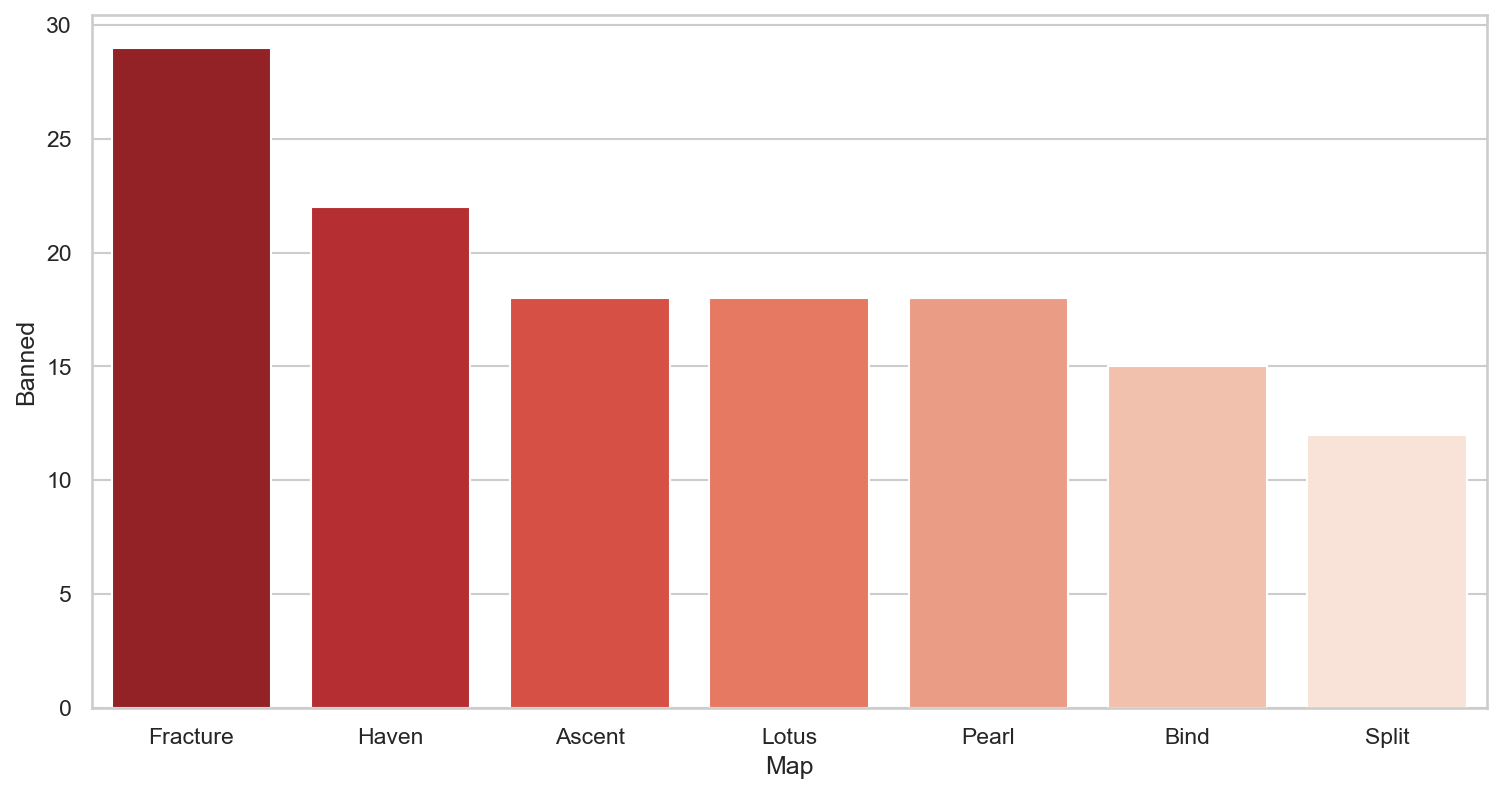

In [177]:
plt.figure(dpi=150, figsize=(12,6))

map_ban_sorted = map_data.sort_values(by='Banned', ascending=False)
sns.barplot(data=map_ban_sorted, x='Map', y='Banned', palette= 'Reds_r')

plt.savefig('Images/Map Bans.jpeg')                                                
plt.show()


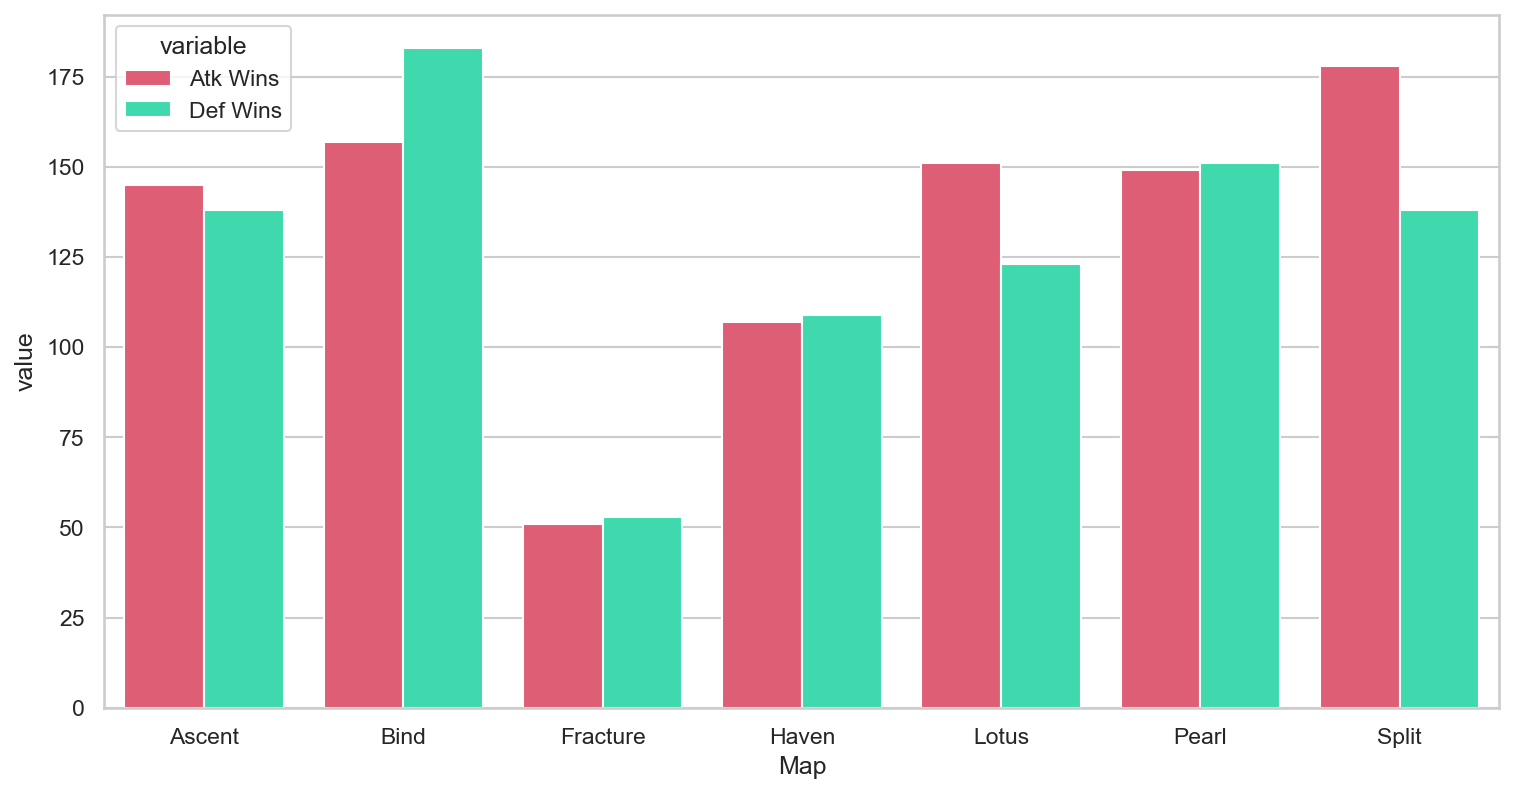

In [178]:
plt.figure(dpi=150, figsize=(12,6))

ss_melt = ss.melt(id_vars=['Map'], value_vars=['Atk Wins', 'Def Wins'])
color_to_add=['#F24968','#27F2B9']

sns.barplot(data=ss_melt, x='Map', y='value', hue='variable', palette=color_to_add)




plt.savefig('Images/Win Rate.jpeg')                                                
plt.show()

In [179]:
ps = pd.read_csv(pwd + '/Data/Edited Data - Player Statistics.csv')
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,NaN
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,NaN
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,NaN


In [180]:
# 50 % of the people have played at least 9 maps
condition_value = 14
ps2 = ps.sort_values(by='KD', ascending=False)
ps3 = ps2[ps2['Maps'] >= condition_value]
ps3.head(10)

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
6,Alfajer,Turkey,Fnatic,14,233,168,36,1.38,1.60,232,16.6,12.0,2.5,Killjoy,Cypher,Chamber
28,Leo,Sweden,Fnatic,14,201,147,119,1.36,2.17,206,14.3,10.5,8.5,Sova,Skye,Fade
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,NaN
11,Less,Brazil,LOUD,24,416,344,100,1.20,1.50,227,17.3,14.3,4.1,Killjoy,Viper,NaN
18,Derke,Finland,Fnatic,14,206,180,44,1.14,1.38,218,14.7,12.8,3.1,Raze,Jett,NaN
37,C0M,United States,Evil Geniuses,21,330,294,144,1.12,1.61,195,15.7,14.0,6.8,Sova,Viper,NaN
19,Cauanzin,Brazil,LOUD,24,391,348,207,1.12,1.71,217,16.2,14.5,8.6,Skye,Fade,Sova
9,Jawgemo,Cambodia,Evil Geniuses,21,362,325,154,1.11,1.58,228,17.2,15.4,7.3,Raze,Omen,Astra
23,Something,Russia,Paper Rex,16,269,245,73,1.09,1.39,210,16.8,15.3,4.5,Jett,Reyna,Breach


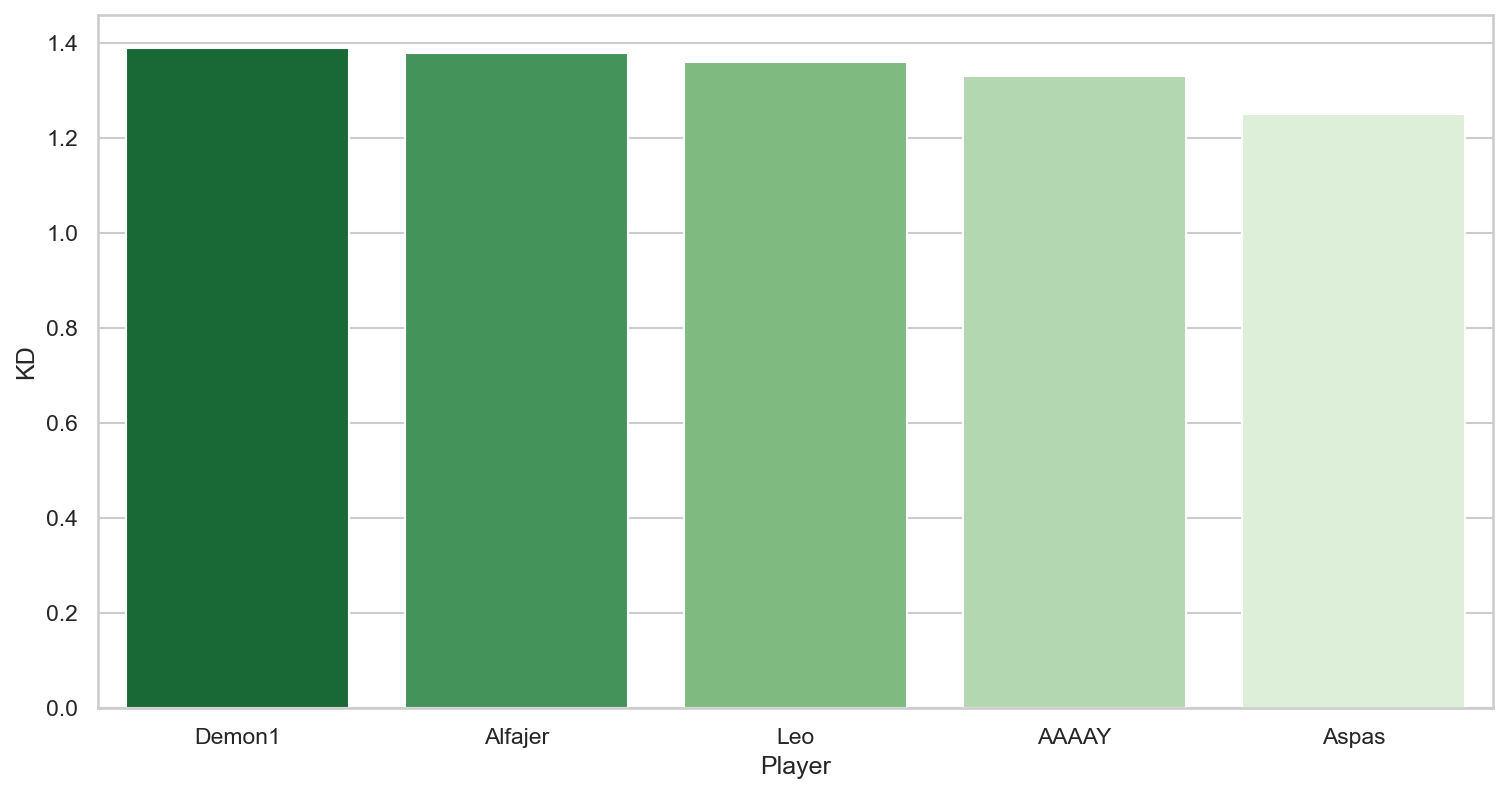

In [181]:
plt.figure(dpi=150, figsize=(12,6))

sort_KD = ps.sort_values(by='KD', ascending=False).iloc[:5]
sns.barplot(data=sort_KD, x='Player', y='KD', palette='Greens_r')


plt.savefig('Images/Top 5 KD.jpeg')
plt.show()

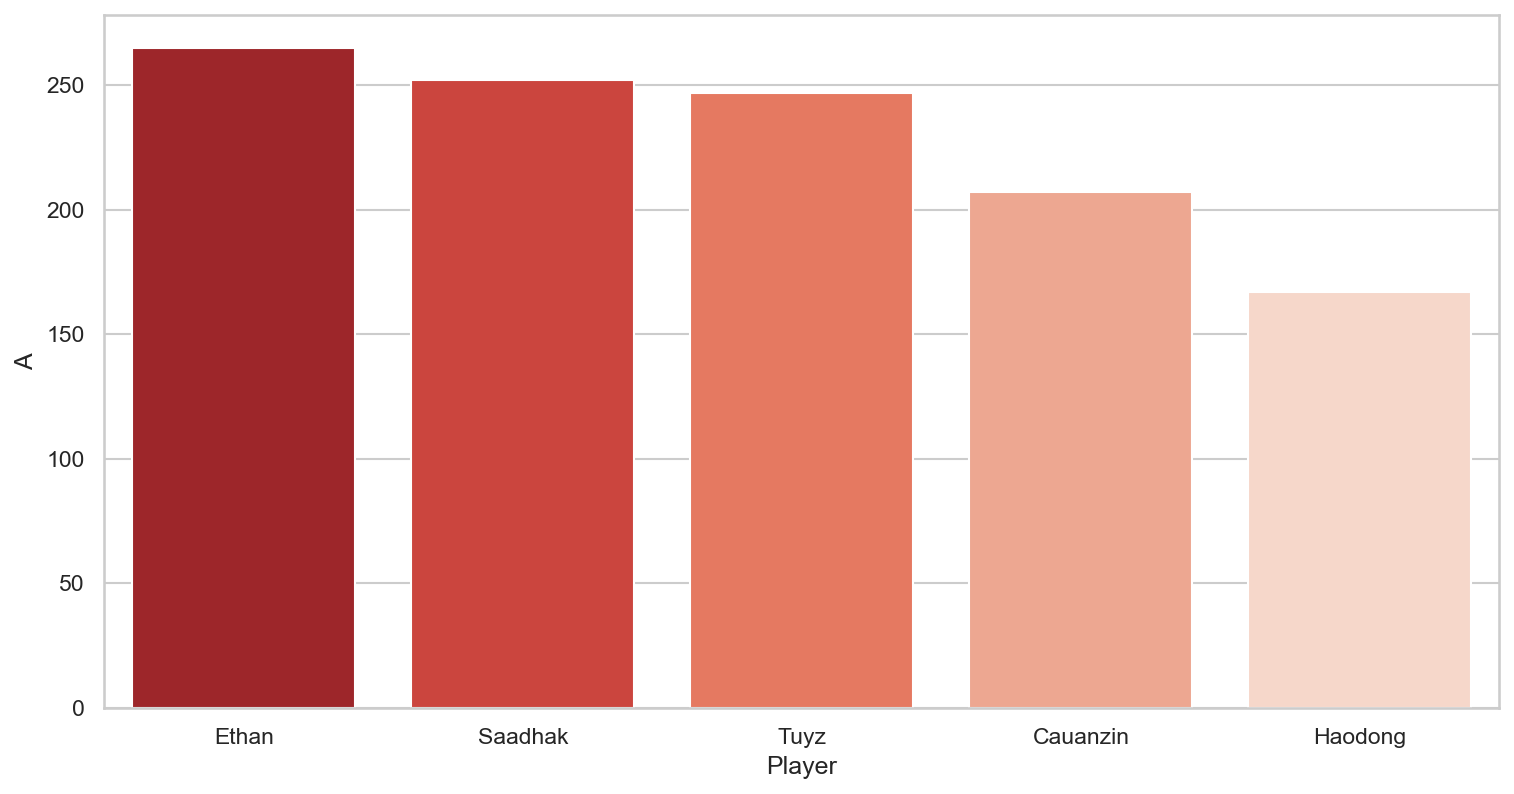

In [182]:


plt.figure(dpi=150, figsize=(12,6))

sort_A =ps.sort_values(by='A', ascending=False).iloc[:5]
sns.barplot(data=sort_A, x='Player', y='A', palette='Reds_r')

plt.savefig('Images/Top 5 Assits.jpg')
plt.show()




# Working on agent picks

In [183]:
ps.fillna(" ", inplace = True)
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,


In [184]:
ps2 = ps[['Agent 1', 'Agent 2', 'Agent 3']]
ps2

,Agent 1,Agent 2,Agent 3
0,Raze,Jett,
1,Raze,Jett,
2,Jett,Astra,Chamber
3,Raze,Jett,
4,Raze,Phoenix,
...,...,...,...
75,Omen,Killjoy,Brimstone
76,Astra,Viper,Harbor
77,Skye,Astra,
78,Brimstone,Astra,


In [185]:
agent_pick = ps2[['Agent 1', 'Agent 2', 'Agent 3']].stack().value_counts().reset_index().tail(-1)

ap = agent_pick.rename(columns={'index': 'agents', 'count':'pick rate'})

In [186]:
data = ap.to_dict('list')

result_dict = {}

for agent, pick_rate in zip(data['agents'], data['pick rate']):
    agent = agent.strip()
    result_dict[agent] = result_dict.get(agent, 0) + pick_rate

agent_pick_rate = pd.DataFrame(result_dict.items(), columns=['Agent', 'Total Pick Rate'])
agent_pick_rate


,Agent,Total Pick Rate
0,Killjoy,22
1,Raze,17
2,Skye,18
3,Viper,19
4,Omen,16
5,Breach,13
6,Sova,12
7,Jett,17
8,Astra,11
9,Brimstone,11


In [187]:
agent_pick_rate.to_csv(path_or_buf= 'Data/Data - Most Agent Picked.csv')


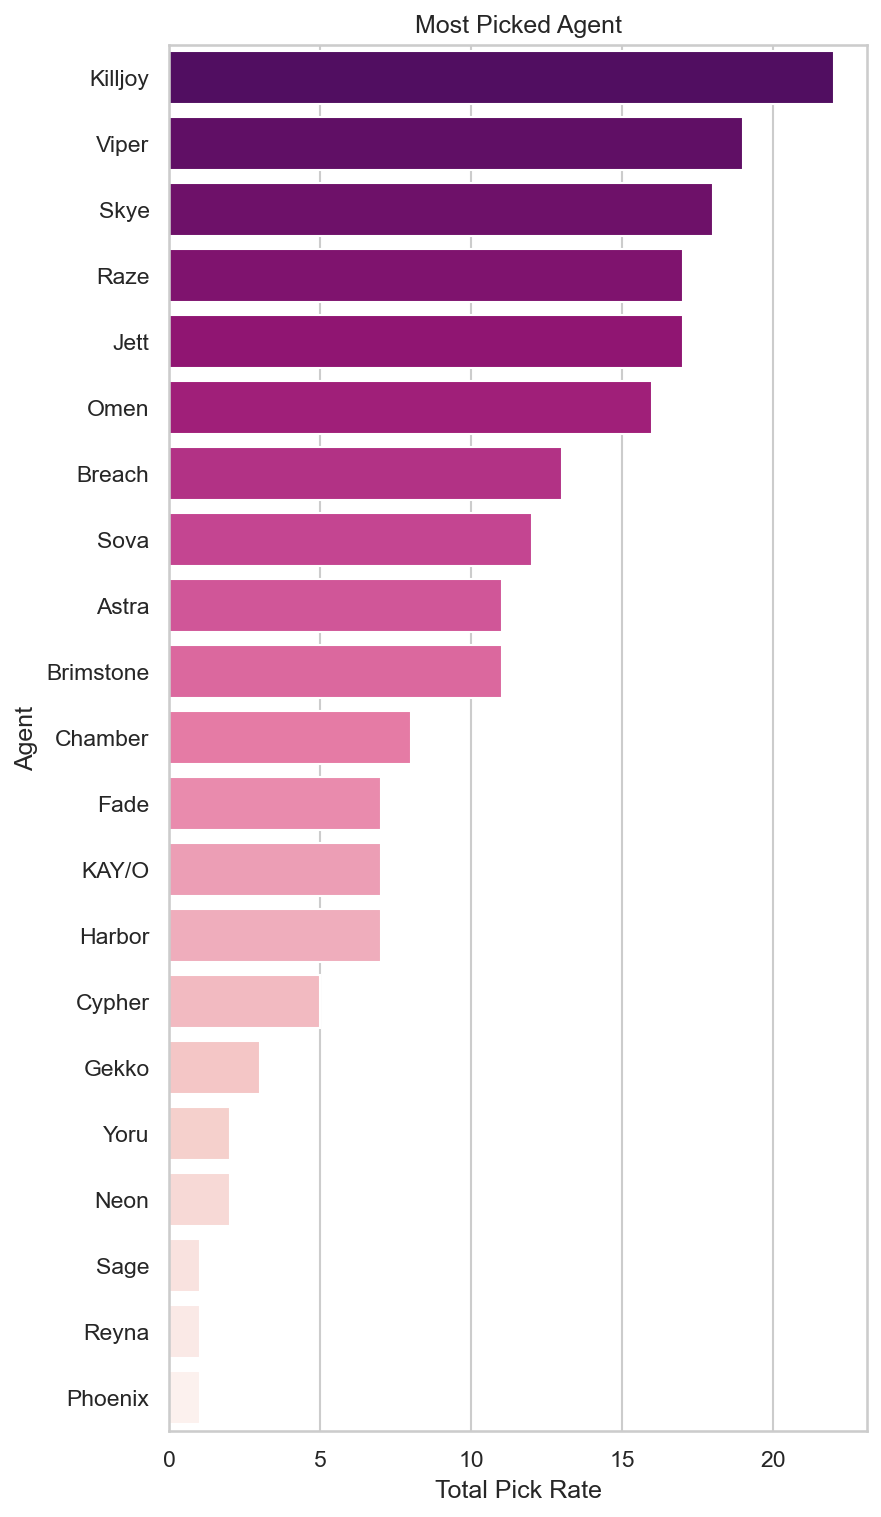

In [188]:


plt.figure(dpi=150, figsize=(6,12))

agpr_sorted = agent_pick_rate.sort_values(by= 'Total Pick Rate', ascending= False)
sns.barplot(data= agpr_sorted, x='Total Pick Rate', y = 'Agent', palette='RdPu_r')

plt.title('Most Picked Agent')
plt.savefig('Images/Agent Counts.jpeg')
plt.show()

In [189]:
ps.head()

,Player,Country,Team,Maps,K,D,A,KD,KDA,ACS/Map,K/Map,D/Map,A/Map,Agent 1,Agent 2,Agent 3
0,Keznit,Chile,KRÜ Esports,4,79,70,21,1.12,1.42,266,19.7,17.5,5.2,Raze,Jett,
1,Whz,China,Bilibili Gaming,11,212,181,41,1.17,1.39,254,19.2,16.4,3.7,Raze,Jett,
2,Demon1,United States,Evil Geniuses,21,421,302,80,1.39,1.65,246,20.0,14.3,3.8,Jett,Astra,Chamber
3,Aspas,Brazil,LOUD,24,446,355,82,1.25,1.48,235,18.5,14.7,3.4,Raze,Jett,
4,Jinggg,Singapore,Paper Rex,16,285,279,92,1.02,1.35,234,17.8,17.4,5.7,Raze,Phoenix,
